<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%205/Exersize%207.%20Generating%20a%20heat%20map%20based%20on%20a%20correlation%20matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import matplotlib and seaborn, and load the Covid totals data:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
covidtotals = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%205/datasets/covidtotals.csv", parse_dates=["lastdate"])

In [2]:
# Generate a correlation matrix.
# View part of the matrix:
corr = covidtotals.corr()
corr[['total_cases','total_deaths','total_cases_pm','total_deaths_pm']]

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
total_cases,1.000000,0.930848,0.230787,0.264819
total_deaths,0.930848,1.000000,0.198456,0.414162
total_cases_pm,0.230787,0.198456,1.000000,0.486600
total_deaths_pm,0.264819,0.414162,0.486600,1.000000
population,0.341093,0.281600,-0.042531,-0.001249
pop_density,-0.027335,-0.032487,0.082927,0.021110
median_age,0.115204,0.173887,0.217352,0.375408
gdp_per_capita,0.134902,0.163701,0.576568,0.372001
hosp_beds,-0.014727,-0.012415,0.015465,0.090870


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


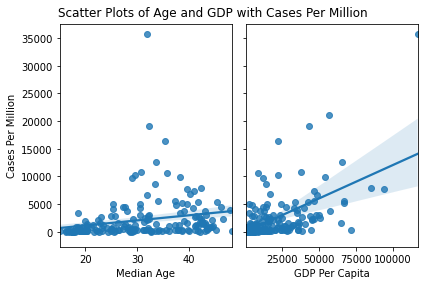

In [3]:
# Show scatter plots of median age and gross domestic product (GDP) per capita by cases per million.
fig, axes = plt.subplots(1,2, sharey=True)
sns.regplot(covidtotals.median_age, covidtotals.total_cases_pm, ax=axes[0])
sns.regplot(covidtotals.gdp_per_capita, covidtotals.total_cases_pm, ax=axes[1])
axes[0].set_xlabel("Median Age")
axes[0].set_ylabel("Cases Per Million")
axes[1].set_xlabel("GDP Per Capita")
axes[1].set_ylabel("")
plt.suptitle("Scatter Plots of Age and GDP with Cases Per Million")
plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

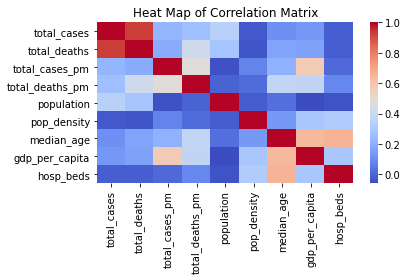

In [4]:
# Generate a heat map of the correlation matrix:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

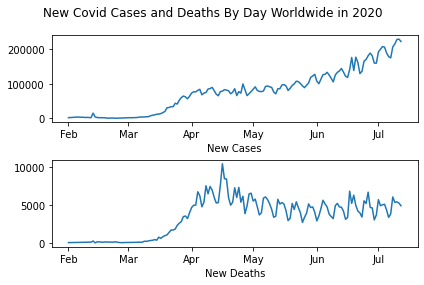

In [5]:
# Show line plots for new cases and new deaths by day.
fig = plt.figure()
plt.suptitle("New Covid Cases and Deaths By Day Worldwide in 2020")
ax1 = plt.subplot(2,1,1)
ax1.plot(coviddailytotals.casedate, coviddailytotals.new_cases)
ax1.xaxis.set_major_formatter(DateFormatter("%b"))
ax1.set_xlabel("New Cases")
ax2 = plt.subplot(2,1,2)
ax2.plot(coviddailytotals.casedate, coviddailytotals.new_deaths)
ax2.xaxis.set_major_formatter(DateFormatter("%b"))
ax2.set_xlabel("New Deaths")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [6]:
# Calculate new cases and deaths by day and region:
regiontotals = coviddaily.loc[coviddaily.casedate.between('2020-02-01','2020-07-12')].\
  groupby(['casedate','region'])[['new_cases','new_deaths']].\
  sum().\
  reset_index()

regiontotals.sample(7, random_state=1)

,casedate,region,new_cases,new_deaths
1518,2020-05-16,North Africa,634.0,28.0
2410,2020-07-11,Central Asia,3873.0,26.0
870,2020-04-05,Western Europe,30090.0,4079.0
1894,2020-06-08,Western Europe,3712.0,180.0
790,2020-03-31,Western Europe,30180.0,2970.0
2270,2020-07-02,North Africa,2006.0,89.0
306,2020-02-26,Oceania / Aus,0.0,0.0


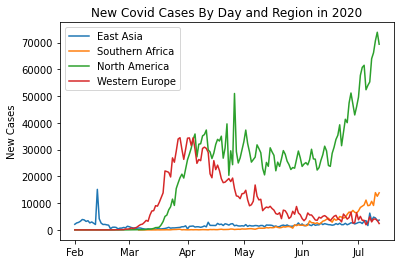

In [7]:
# Show line plots of new cases by selected regions.
showregions = ['East Asia','Southern Africa','North America',
    'Western Europe']

for j in range(len(showregions)):
  rt = regiontotals.loc[regiontotals.region==showregions[j],
                        ['casedate','new_cases']]
  plt.plot(rt.casedate, rt.new_cases, label=showregions[j])

plt.title("New Covid Cases By Day and Region in 2020")
plt.gca().get_xaxis().set_major_formatter(DateFormatter("%b"))
plt.ylabel("New Cases")
plt.legend()
plt.show()

In [8]:
# take a closer look at the South Africa counts
af = regiontotals.loc[regiontotals.region=='Southern Africa',
  ['casedate','new_cases']].rename(columns={'new_cases':'afcases'})
sa = coviddaily.loc[coviddaily.location=='South Africa',
  ['casedate','new_cases']].rename(columns={'new_cases':'sacases'})
af = pd.merge(af, sa, left_on=['casedate'], right_on=['casedate'], how="left")
af.sacases.fillna(0, inplace=True)
af['afcasesnosa'] = af.afcases-af.sacases
afabb = af.loc[af.casedate.between('2020-04-01','2020-07-12')]

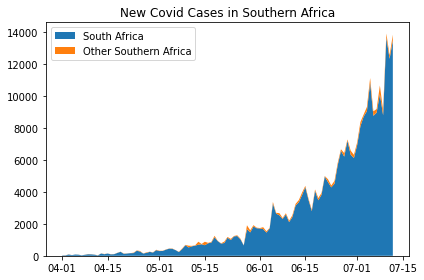

In [9]:
fig = plt.figure()
ax = plt.subplot()
ax.stackplot(afabb.casedate, afabb.sacases, afabb.afcasesnosa, labels=['South Africa','Other Southern Africa'])
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))
plt.title("New Covid Cases in Southern Africa")
plt.tight_layout()
plt.legend(loc="upper left")
plt.show()